This is going to be the similar mass case with circular orbit and then implement Df equation with that


How this Jupyter Notebook will look like:
- Initialize the packets
- initial conditions
- dictate the circular orbit
- forloop
- effective energy plot (coming soon)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import scipy as sci
from scipy import integrate
from scipy.integrate import odeint
from astropy import units as u
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import astropy.constants as const
import math

In [65]:
plt.rcParams['font.family'] = 'Times New Roman'
#this is to make the font of the plots to be Times New Roman

In [66]:
const.G

<<class 'astropy.constants.codata2018.CODATA2018'> name='Gravitational constant' value=6.6743e-11 uncertainty=1.5e-15 unit='m3 / (kg s2)' reference='CODATA 2018'>

This is going to be the initial conditions

In [67]:
plt.rcParams['font.family'] = 'Times New Roman'
# region Code Snippet 1: IC's
G = const.G #change the innate time to years
m_gal = 1e11 * const.M_sun
#Masses
m1=1e6 * const.M_sun #mass of black hole A 
m2=1e6 * const.M_sun #mass of black hole B
# Will be adding the Standard Gravitational Parameter
#r_i
r1=[1e3,0,0] * u.pc
r2=[-1e3,0,0] * u.pc
#To arrays
r1=np.array(r1,dtype="float64") * u.pc
r2=np.array(r2,dtype="float64") * u.pc

#COM
r_com=(m1*r1+m2*r2)/(m1+m2)
#V_i
v1=[0,0.5e3, 0] *u.km/u.s
v2=[0,-0.5e3,0] *u.km/u.s #km/s

# v1 = v1.to(u.m / u.year)
# v2 = v2.to(u.m / u.year)

#To arrays
v1=np.array(v1,dtype="float64") *u.km/u.s
v2=np.array(v2,dtype="float64") *u.km/u.s
#Find velocity of COM
v_com=(m1*v1+m2*v2)/(m1+m2)

r = np.sqrt((r2[0] - r1[0])** 2 + (r2[1] - r1[1])** 2 + (r2[2] - r1[2])** 2)

# endregion



Dynamical Friction and adding them as each component:

In [68]:
# region Code Snippet 2: DF
r1_com = r1 - r_com
r2_com = r2 - r_com

r1_com = np.sqrt(r1_com[0]**2 + r1_com[1]**2 + r1_com[2]**2) #we have to put the magnitude of the distance from each object from the COM
r2_com = np.sqrt(r2_com[0]**2 + r2_com[1]**2 + r2_com[2]**2)
 # region code : Semi Major Axes
#redacted the a becuase r = a in circular orbits
# rmax1 = np.max(r1 - r_com)
# rmin1 = np.min(r1 - r_com)
# a1 = (rmax1+rmin1)/2

# rmax2 = np.max(r2 - r_com)
# rmin2 = np.min(r2 - r_com)
# a2 = (rmax2+rmin2)/2
# endregion

o = ((10**(2.2969))*(m_gal/ (10**(11) * const.M_sun))**(0.299)) * (u.km/u.s)
# region code : Coulomb Logarithm
x1 = (np.abs(r1_com.to(u.km)) * o**(2)) / (G * m1)
x2 = (np.abs(r2_com.to(u.km)) * o**(2)) / (G * m2)
ln_A1 = math.log10(x1.to_value(u.dimensionless_unscaled))
ln_A2 = math.log10(x2.to_value(u.dimensionless_unscaled))
# endregion

F_D1 = 0.428 * ln_A1 * ((G * m1**(2))/r1_com**(2))
F_D2 = 0.428 * ln_A2 * ((G * m2**(2))/r2_com**(2))
print(F_D1, F_D2)

v_r1 = v1 - v_com 
v_r2 = v2 - v_com

v_rmag1 = np.sqrt(v_r1[0]**2 + v_r1[1]**2 + v_r1[2]**2)
v_rmag2 = np.sqrt(v_r2[0]**2 + v_r2[1]**2 + v_r2[2]**2) #will be doing this from now on though linalg.norm does the same

v_rel_unit1 = (v_r1 / v_rmag1)
v_rel_unit2 = (v_r2 / v_rmag2)

print(v_rel_unit1, v_rel_unit2)

# region code: Dynamical Friction Component to Array for BH A
F_D1_i = (F_D1 * -v_rel_unit1[0])
F_D1_j = (F_D1 * -v_rel_unit1[1])
F_D1_k = (F_D1 * -v_rel_unit1[2])
    
F_D1 = np.array([F_D1_i.to((u.kg*u.m)/(u.s**2)).value, F_D1_j.to((u.kg*u.m)/ (u.s**2)).value, F_D1_k.to((u.kg*u.m)/ (u.s**2)).value])
# endregion

# region code: Dynamical Friction Component to Array for BH B
F_D2_i = (F_D2 * -v_rel_unit2[0])
F_D2_j = (F_D2 * -v_rel_unit2[1])
F_D2_k = (F_D2 * -v_rel_unit2[2])
    
F_D2 = np.array([F_D2_i.to((u.kg*u.m)/(u.s**2)).value, F_D2_j.to((u.kg*u.m)/ (u.s**2)).value, F_D2_k.to((u.kg*u.m)/ (u.s**2)).value])
# endregion


F_D1 = F_D1 * ((u.kg * u.m)/(u.s**2))
F_D2 = F_D2 * ((u.kg * u.m)/(u.s**2))
    

F_D1 = (F_D1 / m1).to(u.km / u.s**2)
F_D2 = (F_D2 / m2).to(u.km / u.s**2)




4.4728331705931265e+56 kg m3 / (pc2 s2) 4.4728331705931265e+56 kg m3 / (pc2 s2)
[0. 1. 0.] [ 0. -1.  0.]


In [69]:
T = 50 * u.Gyr
N = 5000
delta_t = T/ N


dv1bydt= ((G*m2*(r2-r1))/r**3).to(u.km / u.s**2) + F_D1
dv2bydt= ((-G*m1*(r2-r1))/r**3).to(u.km / u.s**2)  + F_D2
dr1bydt = v1  # maybe we don't need df subtraction here
dr2bydt = v2 
r_derivs=np.concatenate((dr1bydt.value,dr2bydt.value))
derivs=np.concatenate((r_derivs,dv1bydt.value,dv2bydt.value))

time_span=np.linspace(0, T, N) #Work on this with Kris' link

In [70]:
c = 100

[[-3.60010686e-20 -1.05562705e-17 -0.00000000e+00]
 [-3.60243713e-20 -1.07911966e-17 -0.00000000e+00]
 [-3.60634591e-20 -1.10365675e-17 -0.00000000e+00]
 ...
 [-1.90357303e-16 -5.21599435e-14 -0.00000000e+00]
 [ 4.41275547e-16  5.16448801e-14 -0.00000000e+00]
 [ 1.77973818e-16 -5.18603046e-14 -0.00000000e+00]] [[ 3.60010686e-20  1.05562705e-17 -0.00000000e+00]
 [ 3.60243713e-20  1.07911966e-17 -0.00000000e+00]
 [ 3.60634591e-20  1.10365675e-17 -0.00000000e+00]
 ...
 [ 1.90357303e-16  5.21599435e-14 -0.00000000e+00]
 [-4.41275547e-16 -5.16448801e-14 -0.00000000e+00]
 [-1.77973818e-16  5.18603046e-14 -0.00000000e+00]]


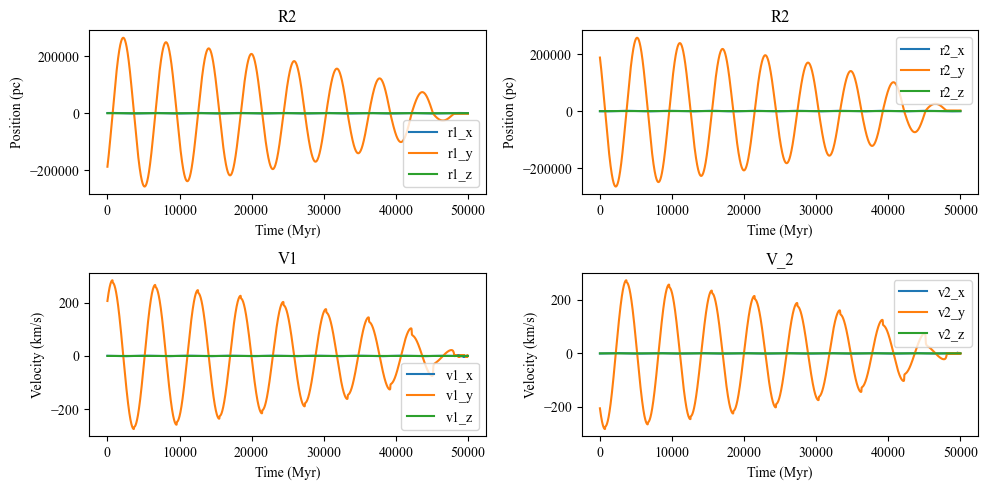

In [80]:
r1_sol = []
r2_sol = []
v1_sol = []
v2_sol = []
F_D1sol = []
F_D2sol = []


for i in range(N):
    dv1bydt=((G*m2*(r2-r1))/r**3).to(u.km / u.s**2) + (c * F_D1)
    dv2bydt=((-G*m1*(r2-r1))/r**3).to(u.km / u.s**2) + (c * F_D2) 
    v1 += dv1bydt * delta_t
    v2 += dv2bydt * delta_t

    r1 += v1.to(u.pc / u.s) * delta_t
    r2 += v2.to(u.pc / u.s) * delta_t
    # region Code Snippet 2: DF
    r1_com = r1 - r_com
    r2_com = r2 - r_com

    r1_com = np.sqrt(r1_com[0]**2 + r1_com[1]**2 + r1_com[2]**2) #we have to put the magnitude of the distance from each object from the COM
    r2_com = np.sqrt(r2_com[0]**2 + r2_com[1]**2 + r2_com[2]**2)
    # region code : Semi Major Axes
    #redacted the a becuase r = a in circular orbits
    # rmax1 = np.max(r1 - r_com)
    # rmin1 = np.min(r1 - r_com)
    # a1 = (rmax1+rmin1)/2

    # rmax2 = np.max(r2 - r_com)
    # rmin2 = np.min(r2 - r_com)
    # a2 = (rmax2+rmin2)/2
    # endregion

    o = ((10**(2.2969))*(m_gal/ (10**(11) * const.M_sun))**(0.299)) * (u.km/u.s)
    # region code : Coulomb Logarithm
    x1 = (np.abs(r1_com.to(u.km)) * o**(2)) / (G * m1)
    x2 = (np.abs(r2_com.to(u.km)) * o**(2)) / (G * m2)
    ln_A1 = math.log10(x1.to_value(u.dimensionless_unscaled))
    ln_A2 = math.log10(x2.to_value(u.dimensionless_unscaled))
    # endregion

    F_D1 = 0.428 * ln_A1 * ((G * m1**(2))/r1_com**(2))
    F_D2 = 0.428 * ln_A2 * ((G * m2**(2))/r2_com**(2))


    v_r1 = v1 - v_com 
    v_r2 = v2 - v_com

    v_rmag1 = np.sqrt(v_r1[0]**2 + v_r1[1]**2 + v_r1[2]**2)
    v_rmag2 = np.sqrt(v_r2[0]**2 + v_r2[1]**2 + v_r2[2]**2) #will be doing this from now on though linalg.norm does the same

    v_rel_unit1 = (v_r1 / v_rmag1)
    v_rel_unit2 = (v_r2 / v_rmag2)

    # region code: Dynamical Friction Component to Array for BH A
    F_D1_i = (F_D1 * -v_rel_unit1[0])
    F_D1_j = (F_D1 * -v_rel_unit1[1])
    F_D1_k = (F_D1 * -v_rel_unit1[2])
        
    F_D1 = np.array([F_D1_i.to((u.kg*u.m)/(u.s**2)).value, F_D1_j.to((u.kg*u.m)/ (u.s**2)).value, F_D1_k.to((u.kg*u.m)/ (u.s**2)).value])
    # endregion

    # region code: Dynamical Friction Component to Array for BH B
    F_D2_i = (F_D2 * -v_rel_unit2[0])
    F_D2_j = (F_D2 * -v_rel_unit2[1])
    F_D2_k = (F_D2 * -v_rel_unit2[2])
        
    F_D2 = np.array([F_D2_i.to((u.kg*u.m)/(u.s**2)).value, F_D2_j.to((u.kg*u.m)/ (u.s**2)).value, F_D2_k.to((u.kg*u.m)/ (u.s**2)).value])
    # endregion


    F_D1 = F_D1 * ((u.kg * u.m)/(u.s**2))
    F_D2 = F_D2 * ((u.kg * u.m)/(u.s**2))
        

    F_D1 = (F_D1 / m1).to(u.km / u.s**2)
    F_D2 = (F_D2 / m2).to(u.km / u.s**2)
    F_D1sol.append([

        (F_D1_i.to((u.kg * u.m) / (u.s**2))/m1).value,
        (F_D1_j.to((u.kg * u.m) / (u.s**2))/m1).value,
        (F_D1_k.to((u.kg * u.m) / (u.s**2))/m1).value
    ])
    F_D2sol.append([

        (F_D2_i.to((u.kg * u.m) / (u.s**2))/m2).value,
        (F_D2_j.to((u.kg * u.m) / (u.s**2))/m2).value,
        (F_D2_k.to((u.kg * u.m) / (u.s**2))/m2).value
    ])




    r1_sol.append(r1.copy())
    r2_sol.append(r2.copy())
    v1_sol.append(v1.copy())
    v2_sol.append(v2.copy())


time_values = np.arange(0, N) * delta_t.to(u.Myr).value  # Convert delta_t to Myr or desired unit


r1_sol = np.array(r1_sol)  
r2_sol = np.array(r2_sol)  
v1_sol = np.array(v1_sol)  
v2_sol = np.array(v2_sol) 
F_D1sol = np.array(F_D1sol)
F_D2sol = np.array(F_D2sol)
print(F_D1sol, F_D2sol)




# region
fig, axs = plt.subplots(2, 2, figsize=(10, 5))


axs[0, 0].plot(time_values, r1_sol[:, 0], label="r1_x")
axs[0, 0].plot(time_values, r1_sol[:, 1], label="r1_y")
axs[0, 0].plot(time_values, r1_sol[:, 2], label="r1_z")
axs[0, 0].set_title("R2")
axs[0, 0].set_xlabel("Time (Myr)")
axs[0, 0].set_ylabel("Position (pc)")
axs[0, 0].legend()


axs[0, 1].plot(time_values, r2_sol[:, 0], label="r2_x")
axs[0, 1].plot(time_values, r2_sol[:, 1], label="r2_y")
axs[0, 1].plot(time_values, r2_sol[:, 2], label="r2_z")
axs[0, 1].set_title("R2")
axs[0, 1].set_xlabel("Time (Myr)")
axs[0, 1].set_ylabel("Position (pc)")
axs[0, 1].legend()


axs[1, 0].plot(time_values, v1_sol[:, 0], label="v1_x")
axs[1, 0].plot(time_values, v1_sol[:, 1], label="v1_y")
axs[1, 0].plot(time_values, v1_sol[:, 2], label="v1_z")
axs[1, 0].set_title("V1")
axs[1, 0].set_xlabel("Time (Myr)")
axs[1, 0].set_ylabel("Velocity (km/s)")
axs[1, 0].legend()


axs[1, 1].plot(time_values, v2_sol[:, 0], label="v2_x")
axs[1, 1].plot(time_values, v2_sol[:, 1], label="v2_y")
axs[1, 1].plot(time_values, v2_sol[:, 2], label="v2_z")
axs[1, 1].set_title("V_2")
axs[1, 1].set_xlabel("Time (Myr)")
axs[1, 1].set_ylabel("Velocity (km/s)")
axs[1, 1].legend()


plt.tight_layout()
plt.show()

# endregion
    


In [83]:
F_D1sol

array([[-3.60010686e-20, -1.05562705e-17, -0.00000000e+00],
       [-3.60243713e-20, -1.07911966e-17, -0.00000000e+00],
       [-3.60634591e-20, -1.10365675e-17, -0.00000000e+00],
       ...,
       [-1.90357303e-16, -5.21599435e-14, -0.00000000e+00],
       [ 4.41275547e-16,  5.16448801e-14, -0.00000000e+00],
       [ 1.77973818e-16, -5.18603046e-14, -0.00000000e+00]])

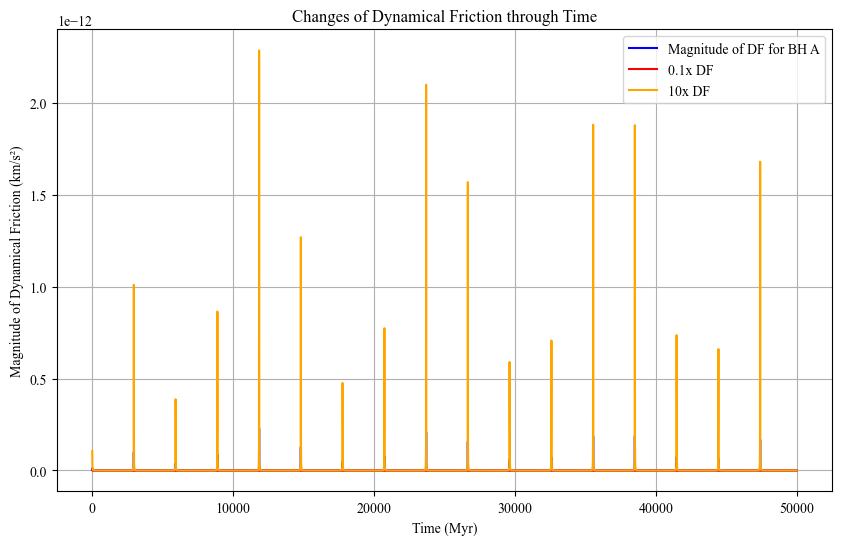

In [ ]:
F_D1_magnitude = np.sqrt(F_D1sol[0]**2 + F_D1sol[1]**2 + F_D1sol[2]**2)
F_D2_magnitude = np.sqrt(F_D2sol[0]**2 + F_D2sol[1]**2 + F_D2sol[2]**2)

plt.figure(figsize=(10, 6))
plt.plot(time_values, F_D1_magnitude, label='Magnitude of DF for BH A', color='blue')
plt.plot(time_values, (0.1 * F_D1_magnitude), label='0.1x DF', color='red')
plt.plot(time_values, (10 * F_D1_magnitude), label='10x DF', color='orange')
# plt.plot(time_values, (100 * F_D1_magnitude), label='100x DF', color='green')

plt.xlabel('Time (Myr)')
plt.ylabel('Magnitude of Dynamical Friction (km/s²)')
plt.title('Changes of Dynamical Friction through Time')
plt.legend()
plt.grid(True)
plt.show()

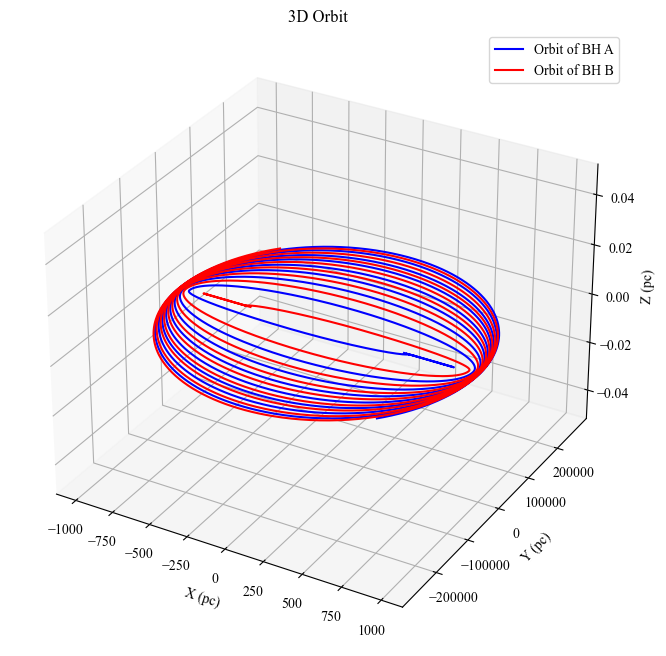

In [81]:
from mpl_toolkits.mplot3d import Axes3D  


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.plot(r1_sol[:, 0], r1_sol[:, 1], r1_sol[:, 2], label="Orbit of BH A", color="blue")


ax.plot(r2_sol[:, 0], r2_sol[:, 1], r2_sol[:, 2], label="Orbit of BH B", color="red")


ax.set_xlabel('X (pc)')
ax.set_ylabel('Y (pc)') 
ax.set_zlabel('Z (pc)')
ax.set_title('3D Orbit')


ax.legend()


plt.show()

/var/folders/rf/799sdl_537nf32dnhw741jq80000gn/T/ipykernel_20297/176411042.py:24: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_zlim([np.min(r1_sol[:, 2]), np.max(r1_sol[:, 2])])


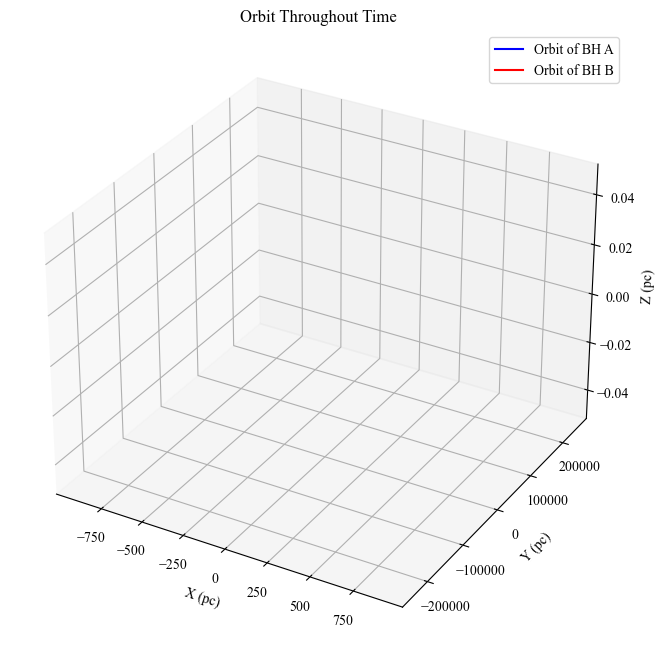

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')


ax.set_xlabel('X (pc)')
ax.set_ylabel('Y (pc)')
ax.set_zlabel('Z (pc)')
ax.set_title('Orbit Throughout Time')


line1, = ax.plot([], [], [], label="Orbit of BH A", color="blue")
line2, = ax.plot([], [], [], label="Orbit of BH B", color="red")
ax.legend()

# Limits for the plot (adjust as needed based on data)
ax.set_xlim([np.min(r1_sol[:, 0]), np.max(r1_sol[:, 0])])
ax.set_ylim([np.min(r1_sol[:, 1]), np.max(r1_sol[:, 1])])
ax.set_zlim([np.min(r1_sol[:, 2]), np.max(r1_sol[:, 2])])


def update(num):

    line1.set_data(r1_sol[:num, 0], r1_sol[:num, 1])
    line1.set_3d_properties(r1_sol[:num, 2])
    
    line2.set_data(r2_sol[:num, 0], r2_sol[:num, 1])
    line2.set_3d_properties(r2_sol[:num, 2])
    
    return line1, line2


# ani = FuncAnimation(fig, update, frames=len(r1_sol), interval=50, blit=True)


# plt.show()


# ani.save("circularorbitDF100.mp4", writer="ffmpeg", fps=60)  # Adjust fps as needed